# Project 1 -  Explore Weather Trends
by Hem Bharti


Overview:-
In this project, I have analyzed local temperature of Ahmedabad, India in accordance with the
global temperature data and compared. I had been provided with a database on Udacity
portal from where I have to extract, manipulate and visualize the data as in the following
goals.

Goals:-
1. Extraction of data from the database and export to CSV file
2. Making a chart visualization based on extracted data
3. Observation based on chart

Tools Used:-

1.SQL:​ To extract the data from the database

2.Python:​ For calculating moving average and plotting line chart

3.ANACONDA - Jupyter Notebook:​ For writing python code and making observations

4.Google Sheets:​ Having a look at the data and writing project


NOTE: In this project I have taken help from various resources in order to make use of
some libraries, keywords and commands correctly. I have listed links or resources in the
references giving a value like (**--**) in steps in order to make reference index.
To write pretty code in this document, I have used google sheets DOCS color formatting.

## Step 1: Getting the data
I have done the following activity in order to make a relevant dataset. I have learnt the SQL
basics from lessons provided before this project. I have also done an introductory course
on SQL and relational database from which I have used some concepts.

First of all it is needed to check the number of rows for the "city_data" table (SQL).

```SQL
SELECT COUNT(YEAR)
FROM city_data;
```

**Output:** 71311

As long as the amount of data is not too big to download it completely, the full dataset will be queried with the * - symbol.

```SQL
SELECT *
FROM city_data;
```

Afterwards I download the *.csv to the subfolder "Data" on my computer. The same process will also be applied on the other two tables. 

```SQL
SELECT *
FROM global_data;
```

```SQL
SELECT *
FROM city_list;
```

**For the following data exploration will be used the scripting language "Python" and "Jupyter Notebook", which is coming with the "Anaconda" distribution.**

**The first step will start with importing the neccessary libraries. Afterwards the three *.csv will be laoded into separate dataframes.**

In [1]:
import warnings #to disable warnings
warnings.filterwarnings('ignore') #disables warnings

#import numpy as np 
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
#make plots visible inside the jupyter notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression #calc the trend-data for later plots
import missingno as ms #visualize missing data

#improving the plot - quality (from: http://blog.rtwilson.com/how-to-get-nice-vector-graphics-in-your-exported-pdf-ipython-notebooks/)
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')


In [2]:
#load the datasets
df_city_data = pd.read_csv("city_data.csv")
df_global_data = pd.read_csv("global_data.csv")
df_city_list = pd.read_csv("city_list.csv")

## Step 2: Exploring the data

**In order to obtain some general knowledge about the dataframes, the .info() - method will be called on each one - starting with the "df_city_data" dataframe. Also it is needed to check the .head() of the dataframes to take a first look on the columns.**

In [3]:
#checking the info of the city_data dataframe
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [4]:
#checking the head of the city_data dataframe
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


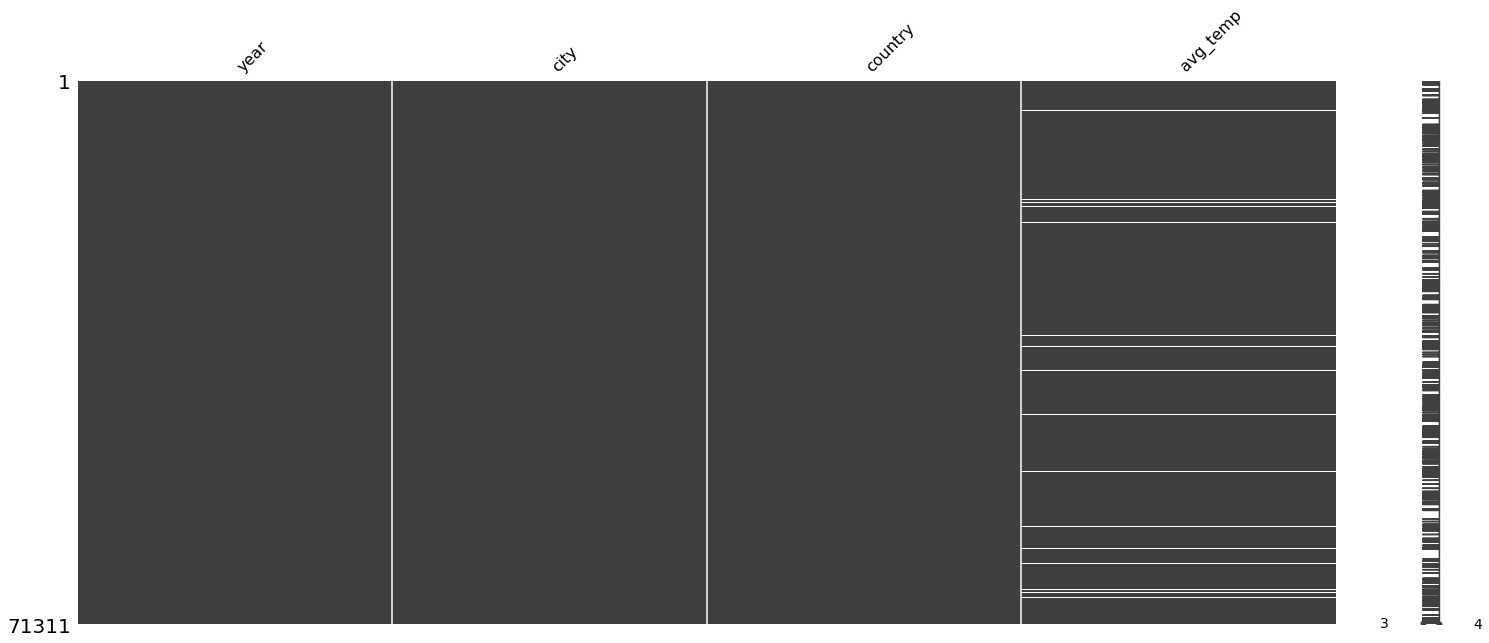

In [5]:
#plot missing values
ms.matrix(df_city_data)

In [6]:
#caluclate missing values in the "avg_temp" column
missing_data = df_city_data["avg_temp"].isna()
sum(missing_data)

2547

In [7]:
#calculate the number of affected unique city names
len(df_city_data[missing_data]["city"].unique())

235

In [8]:
#checking the info of the global_data dataframe
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [9]:
#checking the head of the global_data dataframe
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [10]:
#calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].min())
print(df_global_data["avg_temp"].min())

1750
5.78


In [11]:
#calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].max())
print(df_global_data["avg_temp"].max())

2015
9.83


In [12]:
#select the cities from India out of the city_list dataframe
df_city_list[df_city_list["country"] == "India"]

,city,country
6,Agra,India
7,Ahmedabad,India
12,Allahabad,India
14,Amritsar,India
30,Bangalore,India
44,Bhopal,India
85,Delhi,India
117,Haora,India
125,Hyderabad,India
129,Indore,India


In [13]:
#create a new reference to the city_data dataframe for the city "Ahmedabad"
df_Ahmedabad = df_city_data[df_city_data["city"] == "Ahmedabad"]

In [14]:
#checking the head of the Ahmedabad dataframe
df_Ahmedabad.head()

,year,city,country,avg_temp
8990,1743,Ahmedabad,India,6.33
8991,1744,Ahmedabad,India,10.36
8992,1745,Ahmedabad,India,1.43
8993,1746,Ahmedabad,India,NaN
8994,1747,Ahmedabad,India,NaN


In [15]:
#calcuate the sum of the missing value in the Ahmedabad dataframe in the column "avg_temp"
sum(df_Ahmedabad["avg_temp"].isna())

4

In [16]:
#show the 4 missing values in the Ahmedabad dataframe
df_Ahmedabad[df_Ahmedabad["avg_temp"].isna()]

,year,city,country,avg_temp
8993,1746,Ahmedabad,India,NaN
8994,1747,Ahmedabad,India,NaN
8995,1748,Ahmedabad,India,NaN
8996,1749,Ahmedabad,India,NaN


In [17]:
#create a copy of the city_data dataframe and the global_data dataframe for our needs
df_Ahmedabad = df_city_data[(df_city_data["city"] == "Ahmedabad") & (df_city_data["year"] >= 1750)].copy()
df_global_data_plot = df_global_data[df_global_data["year"] < 2013].copy()

In [18]:
#check if both dataframe have the same length
len(df_global_data_plot) == len(df_Ahmedabad)

False

In [19]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_Ahmedabad["rollingAverage"] = df_Ahmedabad["avg_temp"].rolling(window = avg_num).mean()

#reset the index of the Ahmedabad dataframe
df_Ahmedabad.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data_plot dataframe
df_global_data_plot["rollingAverage"] = df_global_data_plot["avg_temp"].rolling(window = avg_num).mean()


In [20]:
#show the rows 1 to 10 of the Ahmedabad dataframe
df_Ahmedabad[1:10]

,year,city,country,avg_temp,rollingAverage
1,1751,Ahmedabad,India,9.75,NaN
2,1752,Ahmedabad,India,4.84,NaN
3,1753,Ahmedabad,India,8.72,NaN
4,1754,Ahmedabad,India,8.49,NaN
5,1755,Ahmedabad,India,8.26,NaN
6,1756,Ahmedabad,India,9.62,NaN
7,1757,Ahmedabad,India,9.15,NaN
8,1758,Ahmedabad,India,8.25,NaN
9,1759,Ahmedabad,India,9.04,8.595


In [21]:
#show the rows 10 to 20 of the global_data_plot dataframe
df_global_data_plot[1:10]

,year,avg_temp,rollingAverage
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.03


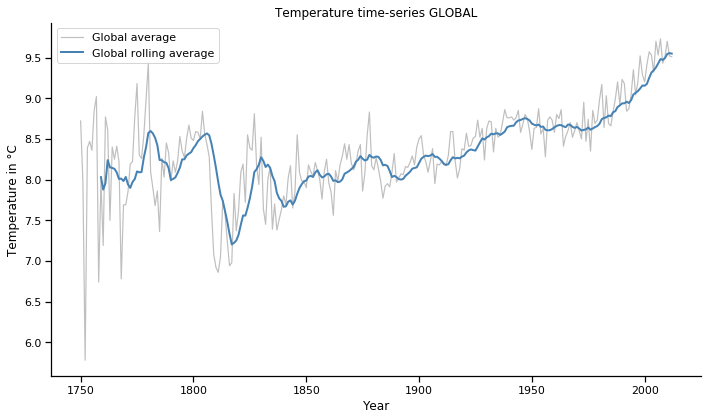

In [22]:
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data_plot, label = "Global average", alpha = 0.5,
                 color = "grey", lw = 1.2)
    sns.lineplot(x = "year", y = "rollingAverage", data = df_global_data_plot, label = "Global rolling average",
                 color = "steelblue", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("Temperature in °C")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("Temperature time-series GLOBAL")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

Text(0.5, 1.0, "Rolling standard deviation for the global 'avg_temp' data")

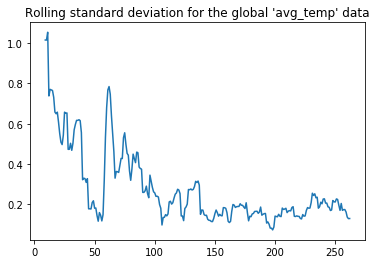

In [23]:
#calculate the rolling standard deviaton for the global_data dataframe and plot it
df_global_data_plot["avg_temp"].rolling(window = avg_num).std().plot()

#set the title for the plot
plt.title("Rolling standard deviation for the global 'avg_temp' data")

In [24]:
def prepare_df(cities, avg_num = 10):
    
    #create empty dict
    results = {}    
    
    #loop for all city names
    for x in cities:
        #selecting dataframe for the chosen city and years bigger or equal 1750 and smaller 2013 (for consistency)
        df_x = df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] >= 1750) &
                            (df_city_data["year"] < 2013)].copy()
        
        #calculate rolling average with window = avg_num
        df_x["rollingAverage"] = df_x["avg_temp"].rolling(window = avg_num).mean()
        
        #calculating the trend
        try:
            #loading the model
            trend_model = LinearRegression()
            
            #define x and y values
            X = df_x[["year"]]
            y = df_x[["avg_temp"]]
            
            #fit the values to the model
            trend_model.fit(X, y)
            
            #predict the values with the X data to get the trend line and add it to the dataframe
            df_x["trend"] = trend_model.predict(X)
            print(f"{x} slope: {trend_model.coef_}")
                       
        except:
            #in case of NaN Values 
            print("Could not calculate trend.")
        
        finally:
            #reset the index and add the dataframe to the dictionary
            df_x.reset_index(inplace = True, drop = True)
            results[x] = df_x    
    
    for x in results:
        #print the average temperature from 1750 to 2013 for the chosen countries
        print(f'The average temperature in {x} (1750 - 2013) is: {results[x]["avg_temp"].mean():.2f} °C')
        print(f'More {x} values: Max: {results[x]["avg_temp"].max():.2f} °C; Min: {results[x]["avg_temp"].min():.2f} °C \n')
    #copy the global data for years < 2014
    df_global = df_global_data[df_global_data["year"] < 2014].copy()
    
    #caluclating the trend line as described above (I could also do this one time outside this function, but in case I 
    #would had to change the global data somehow I put it in here - also I started with the functionality to choose the timescale.)
    try:
        trend_model = LinearRegression()
        X = df_global["year"]
        trend_model.fit(X = df_global[["year"]], y = df_global[["avg_temp"]])
        trend_plot = trend_model.predict(df_global[["year"]])
        df_global["trend"] = trend_plot
        print(f"Global slope: {trend_model.coef_}")
        
    except:
        print("Error while calculating the global trend.")
        
    finally:
        
        df_global["rollingAverage"] = df_global["avg_temp"].rolling(window = avg_num).mean()    
        results["Global"] = df_global

        print(f'The global average temperature (1750 - 2013) is: {df_global["avg_temp"].mean():.2f} °C')
        print(f'More global values: Max: {df_global["avg_temp"].max():.2f} °C; Min: {df_global["avg_temp"].min():.2f} °C')
        #return the dict
        return results

def plot_results(result, fig_size = (10,6), global_plot = True, opac = 0.7, show_normal = False, trend = False):
 
    with sns.plotting_context("notebook"):
        #creating the figure and axes for the plot
        fig, ax = plt.subplots(figsize = fig_size)    

        #if global_plot = True shows the global data
        if global_plot:        
            sns.lineplot(x = "year", y = "rollingAverage", data = result["Global"], label = "Global", lw = 1.7)  
            #if global_plot = True shows the global trend
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result["Global"], label = "Global trend")

            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result["Global"], label = f"Global avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)

        #deletes the "Global" key-value pair in the dictionary to not double plot it    
        result.pop('Global', None)

        #plots the graph for every city-key in the dictionary
        for x in result:
            sns.lineplot(x = "year", y = "rollingAverage", data = result[x], label = x, alpha = opac)
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result[x], label = f"{x} avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result[x], label = f"{x} trend")

        #loads the legend
        ax.legend()

        #set x and y labels and the title
        ax.set_ylabel("Rolling average temperature in °C")
        ax.set_xlabel("Year")
        ax.set_title("Temperature time-series")

        #deactivate right and top spine
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()

        #shows the plot
        plt.show()  

**Now the functions will be tested.**

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


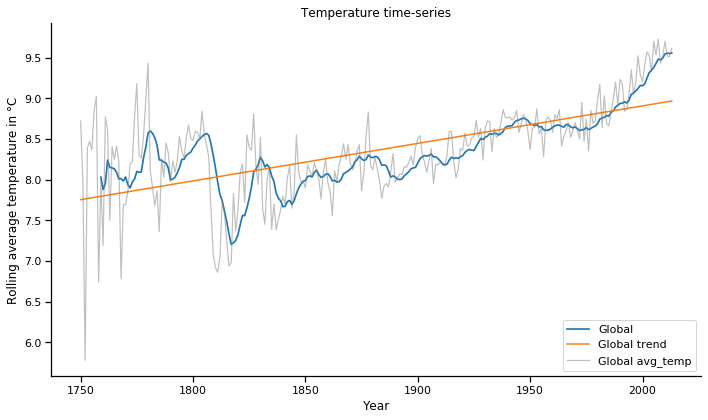

In [25]:
#creating an empty list
cities = []
#calling the newly created functions
plot_results(prepare_df(cities), global_plot=True, show_normal=True, opac = 1, trend = True)

Ahmedabad slope: [[0.00372336]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


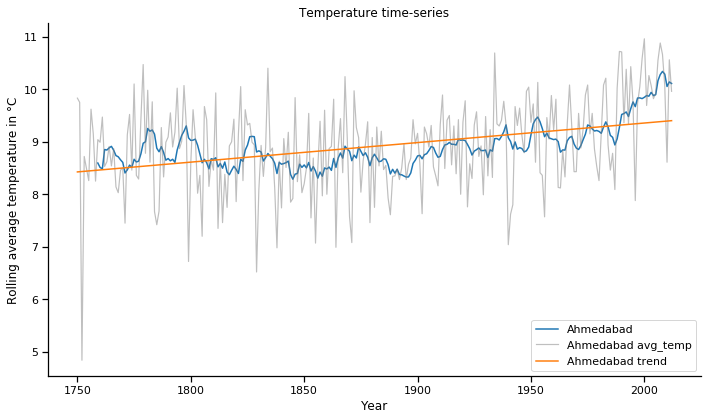

In [26]:
cities = ["Ahmedabad"]
plot_results(prepare_df(cities), global_plot=False, show_normal=True, opac = 1, trend = True)

Text(0.5, 1.0, "Rolling standard deviation for the Ahmedabad 'avg_temp' data")

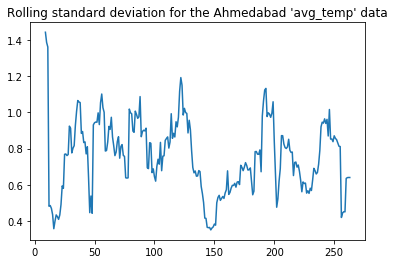

In [27]:
df_Ahmedabad["avg_temp"].rolling(window = avg_num).std().plot()
plt.title("Rolling standard deviation for the Ahmedabad 'avg_temp' data")

**After ~150 years the standard deviation is really low, which is also visible in the first graph around 1900.**

**In the next step the Global data plot will be plotted in the same figure as the Ahmedabad data plot to compare them.**

Ahmedabad slope: [[0.00372336]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


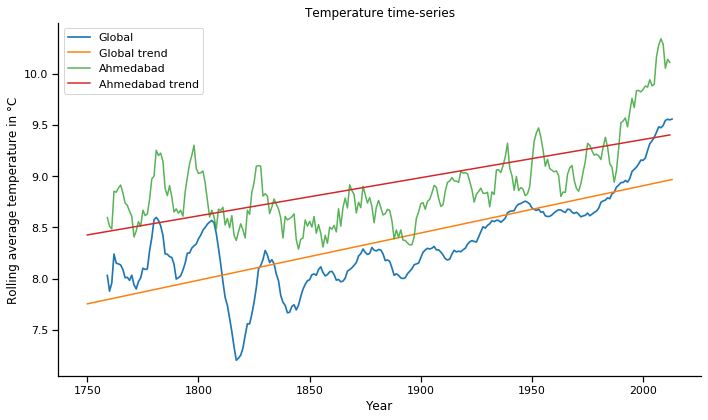

In [28]:
cities = ["Ahmedabad"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

In [29]:
#calculating the correlation between the Ahmedabad avg_temp and the global avg_temp
df_Ahmedabad[["avg_temp"]].corrwith(df_global_data_plot["avg_temp"])

avg_temp    0.511079
dtype: float64

Ahmedabad slope: [[0.00372336]]
Mumbai slope: [[0.00382813]]
Udaipur slope: [[0.00347713]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Mumbai (1750 - 2013) is: 8.33 °C
More Mumbai values: Max: 10.37 °C; Min: 4.65 °C 

The average temperature in Udaipur (1750 - 2013) is: 4.64 °C
More Udaipur values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


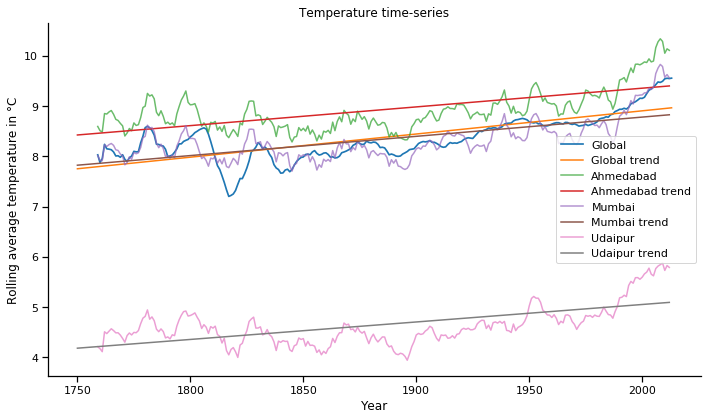

In [30]:
cities = "Ahmedabad Mumbai Udaipur".split()
plot_results(prepare_df(cities), opac = 0.7, trend=True)

In [31]:
#getting the avg_temp data for Ahmedabad and Udaipur in the year 2013
for x in ["Ahmedabad", "Udaipur"]:
    print(f'{x}: {df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] == 2013)]["avg_temp"]}')

Ahmedabad: 9260    10.12
Name: avg_temp, dtype: float64
Udaipur: 44264    6.0
Name: avg_temp, dtype: float64


Mumbai slope: [[0.00382813]]
The average temperature in Mumbai (1750 - 2013) is: 8.33 °C
More Mumbai values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


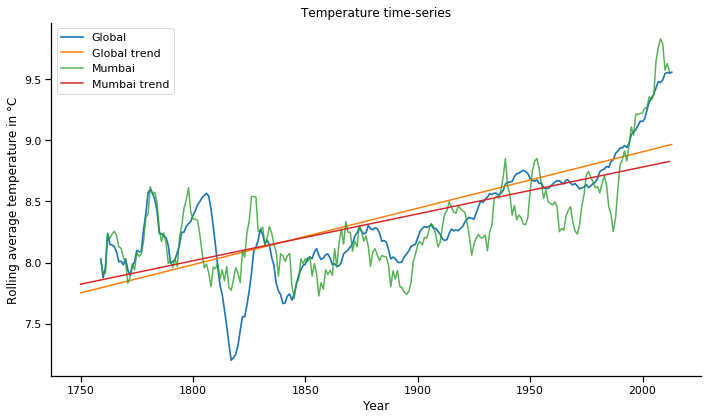

In [32]:
cities = ["Mumbai"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

Ahmedabad slope: [[0.00372336]]
Mumbai slope: [[0.00382813]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Mumbai (1750 - 2013) is: 8.33 °C
More Mumbai values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


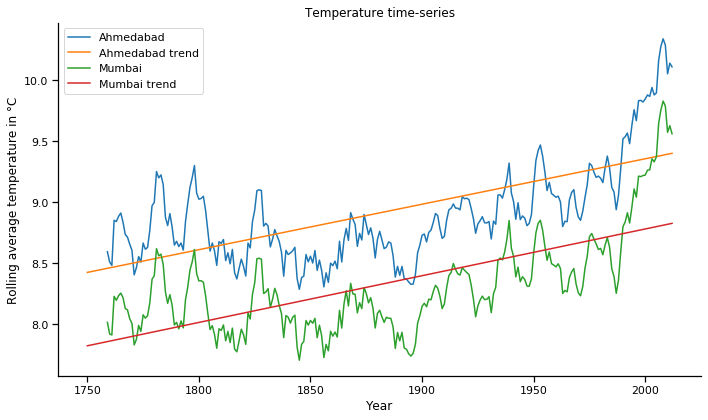

In [33]:
cities = ["Ahmedabad", "Mumbai"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

**It is obvious that the both graphs are very similar to each other.**

In [34]:
#calculating the correlation between the Ahmedabad avg_temp and the Mumbai avg_temp
prepare_df(["Ahmedabad"])["Ahmedabad"][["avg_temp"]].corrwith(prepare_df(["Mumbai"])["Mumbai"]["avg_temp"])

Ahmedabad slope: [[0.00372336]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Mumbai slope: [[0.00382813]]
The average temperature in Mumbai (1750 - 2013) is: 8.33 °C
More Mumbai values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.982597
dtype: float64

**With 0.98 calculated correlation both datasets are in fact strongly correlated.**

**The last city to take a look on is Munich.**

Udaipur slope: [[0.00347713]]
The average temperature in Udaipur (1750 - 2013) is: 4.64 °C
More Udaipur values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


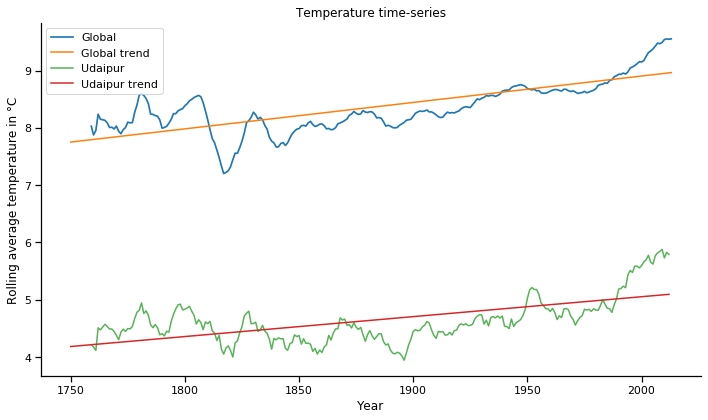

In [35]:
cities = ["Udaipur"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

Ahmedabad slope: [[0.00372336]]
Udaipur slope: [[0.00347713]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Udaipur (1750 - 2013) is: 4.64 °C
More Udaipur values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


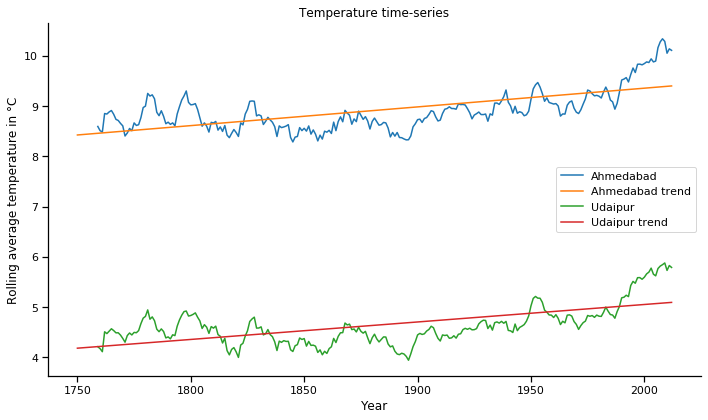

In [36]:
cities = ["Ahmedabad", "Udaipur"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

In [37]:
#calculating the correlation between the Ahmedabad avg_temp and the Udaipur avg_temp
prepare_df(["Ahmedabad"])["Ahmedabad"][["avg_temp"]].corrwith(prepare_df(["Udaipur"])["Udaipur"]["avg_temp"])

Ahmedabad slope: [[0.00372336]]
The average temperature in Ahmedabad (1750 - 2013) is: 8.91 °C
More Ahmedabad values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Udaipur slope: [[0.00347713]]
The average temperature in Udaipur (1750 - 2013) is: 4.64 °C
More Udaipur values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.903107
dtype: float64

**In case the city names are not unique, a unique key - created out of the city + country name - has to be created and used.**

In [38]:
#check for duplicates among the city column
cities = df_city_data.groupby(["city", "country"], as_index = False).count()["city"]
cities[cities.duplicated()]

11        Alexandria
35         Barcelona
46        Birmingham
72           Colombo
125        Hyderabad
156         Kingston
163           La Paz
174           London
177      Los Angeles
280         Santiago
281         Santiago
283    Santo Domingo
324         Valencia
Name: city, dtype: object

**Since there are duplicates among the city names, the new key will be created in the next step.**

In [39]:
#creating the key by joining the city and country column
df_city_data["key"] = df_city_data[["city", "country"]].apply(lambda x: " - ".join(x), axis=1)

In [40]:
df_city_data.head()

,year,city,country,avg_temp,key
0,1849,Abidjan,Côte D'Ivoire,25.58,Abidjan - Côte D'Ivoire
1,1850,Abidjan,Côte D'Ivoire,25.52,Abidjan - Côte D'Ivoire
2,1851,Abidjan,Côte D'Ivoire,25.67,Abidjan - Côte D'Ivoire
3,1852,Abidjan,Côte D'Ivoire,NaN,Abidjan - Côte D'Ivoire
4,1853,Abidjan,Côte D'Ivoire,NaN,Abidjan - Côte D'Ivoire


**Now the unique key is created and will be used to calculate the correlation for all the cities.**

In [41]:
def calc_corr(cities, startYear):
     
    #creating an empty dictionary
    corr = {}    
    
    for x in cities:
        #selecting and copying the correct dataframe given different conditions
        df_x = df_city_data[(df_city_data["key"] == x) & (df_city_data["year"] >= startYear) & (df_city_data["year"] <= 2015)].copy()
        #reset the index to align the index of both dataframes
        df_x.reset_index(inplace = True)
        #calculate the correlation and add the result to the dictionary
        corr[x] = df_x[["avg_temp"]].corrwith(df_global_data["avg_temp"], axis = 0)
        
    #return the dictionary    
    return corr

In [42]:
corr_all = calc_corr(df_city_data["key"].unique(), 1750)
df_corr = pd.DataFrame(corr_all)
df_corr = df_corr.transpose().sort_values("avg_temp", ascending = False)
df_corr.reset_index(inplace = True)
df_corr["city"] = df_corr["index"].apply(lambda x: x.split(" - ")[0])
df_corr["country"] = df_corr["index"].apply(lambda x: x.split(" - ")[1])
df_corr.set_index("city", inplace = True)

In [43]:
df_corr.head()

,index,avg_temp,country
city,,,
Ufa,Ufa - Russia,0.763481,Russia
Tunis,Tunis - Tunisia,0.739872,Tunisia
Valencia,Valencia - Spain,0.721943,Spain
Montreal,Montreal - Canada,0.721534,Canada
Ottawa,Ottawa - Canada,0.718663,Canada


In [44]:
#choosing the indian cities out of the new dictionary
print(df_corr.loc[["Ahmedabad", "Mumbai", "Udaipur"]]["avg_temp"]) 

city
Ahmedabad    0.515946
Mumbai       0.512275
Udaipur      0.559655
Name: avg_temp, dtype: float64


In [45]:
df_corr[["avg_temp", "country"]].head(5)

,avg_temp,country
city,,
Ufa,0.763481,Russia
Tunis,0.739872,Tunisia
Valencia,0.721943,Spain
Montreal,0.721534,Canada
Ottawa,0.718663,Canada


In [46]:
df_corr[["avg_temp", "country"]][df_corr["avg_temp"] < 0.01].head(5)

,avg_temp,country
city,,
Ouagadougou,0.005583,Burkina Faso
Lagos,0.002495,Nigeria
Luanda,0.001921,Angola
Maseru,0.001244,Lesotho
Monrovia,-0.001666,Liberia


In [47]:
df_corr[["avg_temp", "country"]].tail(5)

,avg_temp,country
city,,
Asmara,-0.083861,Eritrea
Guayaquil,-0.088970,Ecuador
Harare,-0.095168,Zimbabwe
Maiduguri,-0.103415,Nigeria
Kano,-0.115508,Nigeria


## Step 3: Conclusion

**To conclude, there is a clear overall uptrend visible, what means, that the average global temperature is increasing, with an also increasing tempo.**

The Indian cities Mumbai, Ahmedabad and Udaipur got compared to the global data (1750 - 2013):
* the slope of the global trend is higher than compared to the Indian cities, so the global average temperature is increasing faster (looking at this long time period)
* Ahmedabad has the highest average temperature among the Indian cities, making Ahmedabad the only city that has a higher average temperature than the global
* Mumbai is the closest to the global average temperature, while Udaipur has the lowest average temperature, but also the highest correlation to the global data compared to the other two Indian cities

